In [ ]:
from sys import stdout

import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

from sklearn.metrics import confusion_matrix

In [ ]:
data = mpimg.imread(r'C:\Users\nadra\Python\Data\seismics1\seismic-1184.png')
data = data[:,:,:1]/255

mask = mpimg.imread(r'C:\Users\nadra\Python\Data\faults\fault-1184.png').copy()
mask = (mask-mask.min())/(mask.max()-mask.min())

plt.matshow(data[:,:,0], interpolation='spline16', cmap=plt.cm.gray, aspect=1)
plt.matshow(mask, interpolation='spline16', aspect=1)



In [ ]:
#Start from here

Seismic grayscale image shape: (2664, 4166)
Fault mask shape: (2664, 4166, 3)


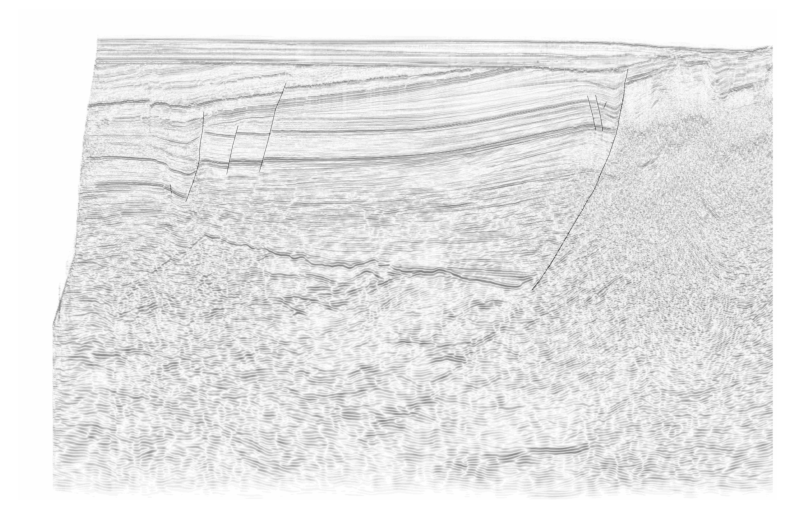

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Function to load the seismic and fault images
def load_data(seismic_path, fault_path):
    # Read the seismic image (RGB)
    seismic_img = mpimg.imread(seismic_path)
    
    # Read the fault mask image (assumed to be in grayscale or binary format)
    fault_img = mpimg.imread(fault_path)
    
    # Convert the seismic image (RGB) to grayscale using the luminosity method
    # Grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
    grayscale_seismic = 0.2989 * seismic_img[:, :, 0] + 0.5870 * seismic_img[:, :, 1] + 0.1140 * seismic_img[:, :, 2]
    
    # Normalize the fault mask to [0, 1] (if not already normalized)
    fault_mask = (fault_img - fault_img.min()) / (fault_img.max() - fault_img.min())
    
    return grayscale_seismic, fault_mask

# Example usage with a single pair of images
seismic_path = r'C:\Users\nadra\Python\Data\seismics1\seismic-1184.png' 
fault_path = r'C:\Users\nadra\Python\Data\faults\fault-1184.png'

# Load the seismic and fault data
seismic_grayscale, fault_mask = load_data(seismic_path, fault_path)

# Check the shape of the data
print(f"Seismic grayscale image shape: {seismic_grayscale.shape}")
print(f"Fault mask shape: {fault_mask.shape}")

# Visualize the grayscale seismic image and overlay the fault mask
plt.figure(figsize=(10, 10))

# Display the grayscale seismic image (no colormap needed, it's already grayscale)
plt.imshow(seismic_grayscale, cmap='gray', alpha=1.0)  # Seismic image in grayscale
plt.axis('off')  # Hide axis

# Overlay the fault mask with transparency (alpha = 0.5)
plt.imshow(fault_mask, cmap='Reds', alpha=0.5)  # Fault mask in red with transparency
plt.axis('off')  # Hide axis

# Show the result
plt.show()
